**TODO 1:** Napraviti regresioni model koji predviđa cenu kuće na osnovu površine placa koristeći `statsmodels` i zatim:
1. statističkim testom proveri da li je linearnost modela zadovoljena.
1. proveri da li je linearnost modela zadovoljena za nivo pouzdanosti od 99%.
1. nacrtaj najgori i najbolji moguć slučaj (gornju i donju granicu regresione linije) za nivo pouzdanosti od 99%.
1. Ako kupac želi da kupi kuću sa placem od $120m^2$, izračunaj koliko minimalno para mora da potroši za kupovinu kuće. Nacrtaj takvu kuću na grafiku. Za interval poverenja računaj nivo pouzdanosti od 99%.

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

import line_pretpostavke as line

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/housing.csv")

In [3]:
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


In [5]:
x = df['lotsize(m^2)']
y = df['price']

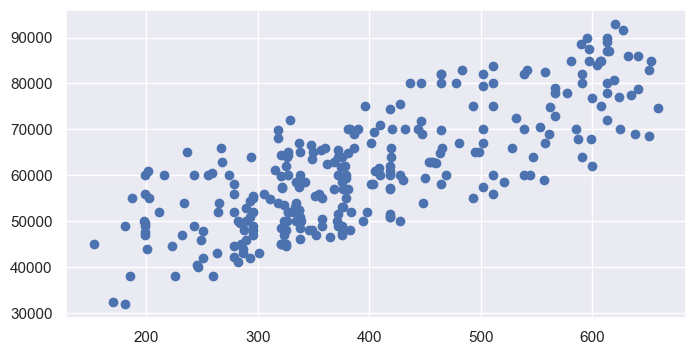

In [6]:
plt.scatter(x, y)

In [8]:

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
y_pred = model.predict(x_with_const)

intercept, slope = model.params

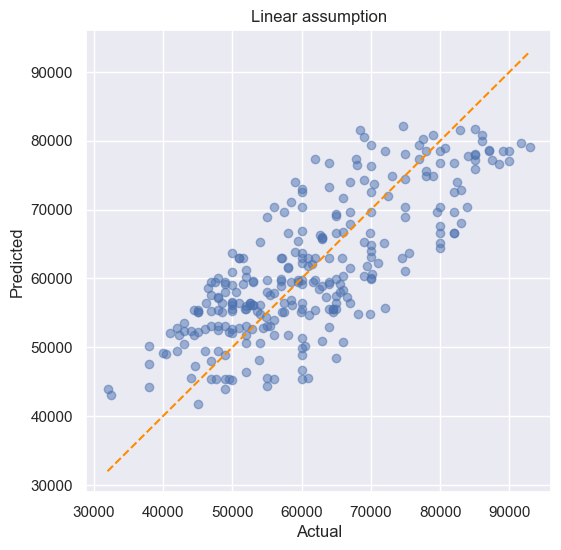

In [27]:
is_linear, p_value = line.linear_assumption(model, x_with_const, y, p_value_thresh=0.01)

In [26]:
if is_linear:
    print('The relationship is linear')
else:
    print('The relationship is not linear')
print(f'p-value: {p_value}')

The relationship is not linear
p-value: 1.798965885933914e-58


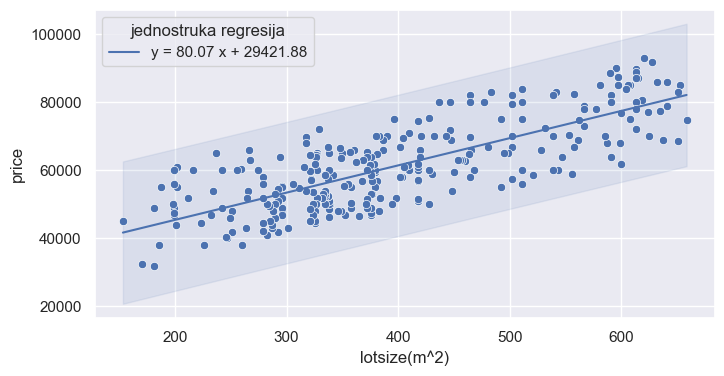

In [18]:
alpha = 0.01 # 99% significance level
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# plotuj interval predikcije
plt.fill_between(df['lotsize(m^2)'],
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)

# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

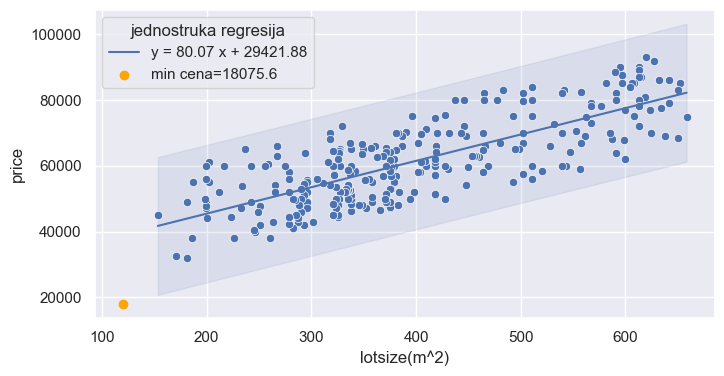

In [23]:
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# plotuj interval predikcije
plt.fill_between(df['lotsize(m^2)'],
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)


# plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')

# racunamo min i max cenu za za kucu sa placom od 450m^2
# definisemo povrsinu placa od 450m^2 (statsmodels zahteva ovakav input)
# racunamo interval predikcije  za datu vrednost od 450
lotsize = 120
lotsize_with_const = sm.add_constant([0, lotsize])
pred_intervals = model.get_prediction(lotsize_with_const).summary_frame(alpha)

mean_y_pred = pred_intervals['mean'][1] # prosecna prediktovanu cenu (kao i do sad)
low_y_pred = pred_intervals['obs_ci_lower'][1] # minimalna cena prema intervalu predikcije
high_y_pred = pred_intervals['obs_ci_upper'][1] # maksimalna cena prema intervalu predikcije

# plotuj interval predikcije za plac velicine 450m^2
# plt.scatter(lotsize, mean_y_pred, c='green', label='prediktovana cena')
plt.scatter(lotsize, low_y_pred, c='orange', label=f'min cena={low_y_pred:.1f}')
# plt.scatter(lotsize, high_y_pred, c='red', label=f'max cena={high_y_pred:.1f}')

plt.legend(title='jednostruka regresija')
plt.show()

In [21]:
df["lotsize(m^2)"].min()

np.float64(153.351)